# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


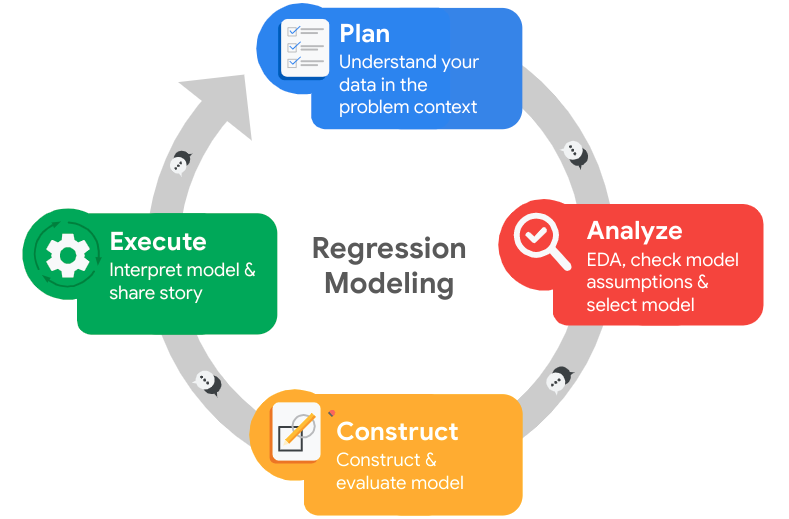

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modelling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                         'average_montly_hours': 'average_monthly_hours',
                         'time_spend_company': 'tenure',
                         'Department': 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
There are no missing data.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [ ]:
3,008 are duplicated rows. that is approximate 20 percent of the dataset.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

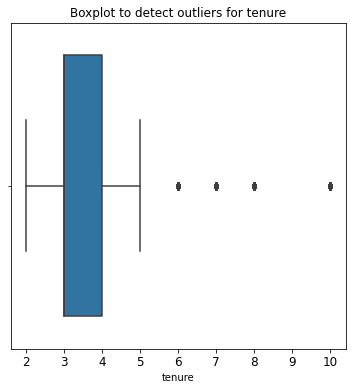

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()



In [ ]:
The boxplot shows that there are outliers.
I can check how many rows contain outliers in the tenure column.

In [12]:
# Determine the number of rows containing outliers

#Compute the 25th percentile value in 'tenure'
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in 'tenure'
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile value in 'tenure'
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in 'tenure'
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 *iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers
print("Number of rows in the data containing outliers in 'tenure':",
     len(outliers))



Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print (df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

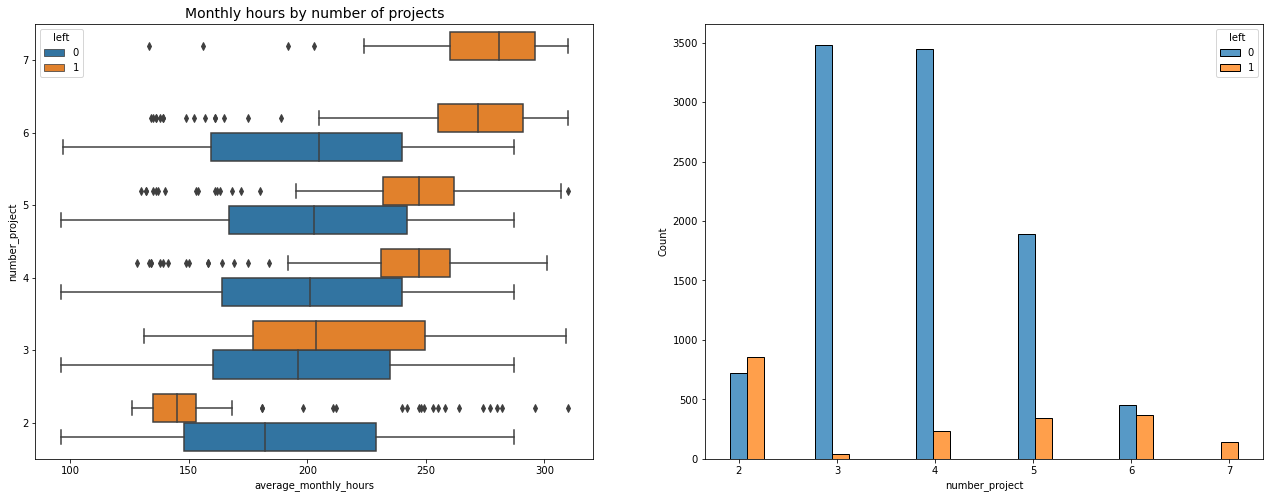

In [14]:
# Create a plot as needed
# Set figure and axes.
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Create boxplot showing 'average_monthly_hours', distributions for 
# 'number_project', comparing employees who stayed versus those left.

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project',
           hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of 'number_project', comparing 
# employees who stayed versus those left.
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge',
           shrink=2, ax=ax[1])

# Display the plots.
plt.show()


In [ ]:
It is normal to think that people who work on more projects would also work 
longer hours. This seems to be the case here, having the mean hours of each 
group (stayed and left) increasing with the number of projects worked.
Unfortunately, few thinks stand out from the plots.

There are two groups of employees who left the company: (A) those that 
worked s significantly less than their peers with the same number of 
projects, and (B) those who worked more. Employees in group A, there is 
the posibility that they were fired. And it is reasnable to think that 
employees in group B quit.

Employees with seven projects left the company, and the interquartile 
ranges of this group and those that left with six projects was ~255-295
hours/week, much more than any other group.

The optimal number of projects to work on seems to be 3-4. The ratio of
left left/stayed is very small.

If I assume a work week of 40 hours and two weeks vacation per year, then
the average number of working hours per month Monday to Friday =
50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This
means that, aside from employees who worked on two projects, every
group worked considerably more hours than this. It seems that employees 
are overworked.

In [15]:
# Get value counts of stayed/left for employees with 7 projects.
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

In [ ]:
This verifies that all employees with 7 projects did leave.

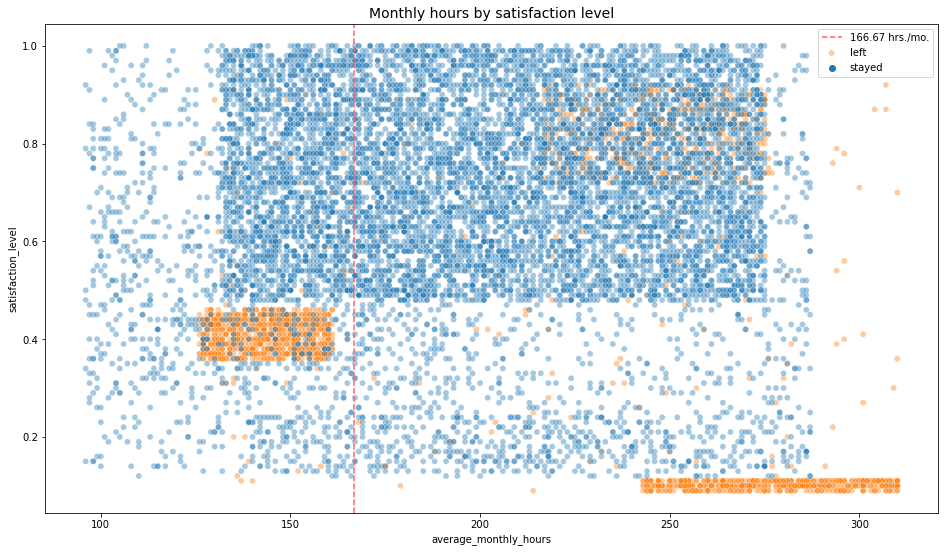

In [16]:
# Create a plot as needed
# Create a scatterplot of 'average_monthly_hours' versus 'satisfaction_level',
# comparing employees who stayed versus those left.

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level',
               hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs/mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');


In [ ]:
The scatterplot shows that there was a sizeable group of employees who worked
~240-315 hours per month, which is over 75 hours per week for a year.
It is possible that this is a direct contribution to the satisfaction levels
being close to zero.

The plot also shows another group of employees who left, they that had
normal working hours. But, there satisfaction level was around 0.4. It is 
difficult to know why they would have left. It is possible to assume 
that they felt pressured to work more, seeing that their peers worked more.

There is a group of employees who worked ~210-280 hours per month, and had 
a satisfaction level of 0.7-0.9.

Note, the strange shape of the distributions is indicative of data manipulation
or synthetic data.

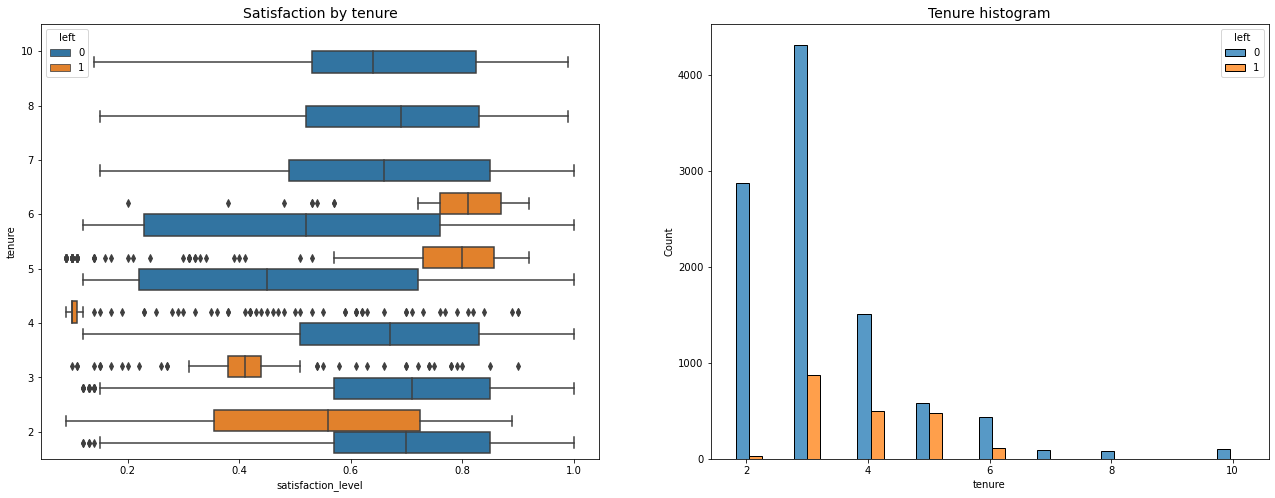

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create a boxplot showing distributions of 'satisfaction_level' by tenure,
# comparing employees who stayed versus those left.
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left',
           orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')


# Create histogram showing the distribution of 'tenure', comparing employees
# who stayed versus those left.
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5,
            ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();



In [ ]:
The plots show employees that left fall into two categories: dissatisfied
employees with shorter tenures and very satisfied employees with medium-
length tenures. Employees with tenure of 4 years have a very low satisfaction
level. If possible, company policies might have affected them. The longest 
tenured employees did not leave. But, their satisfaction level is similiar 
to newer employees. It is possible that these are higher-ranked, higher-paid
employees.

In [18]:
# Calculate mean and median satisfaction scores of employees who 
# left and stayed.
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [ ]:
The mean and median satisfaction scores of employees that left are 
lower than those that stayed. looking at the mean satisfaction score of the 
employees that stayed, the mean satisfaction score is lower than the 
median score. This means that the satisfaction level is skewed to the left.

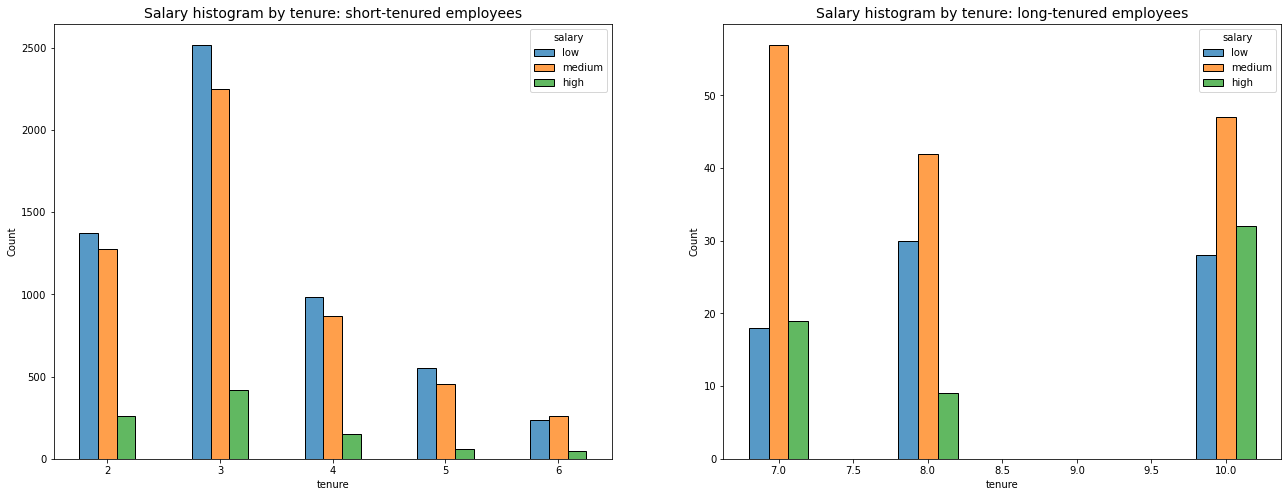

In [19]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenure employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

#Plot short-tenured employees
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5,
            ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured employees',
                fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4,
             ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured employees',
               fontsize='14');

In [ ]:
The plots show that long-tenured employees were not disproprotionately
comprised of higher paid employees.

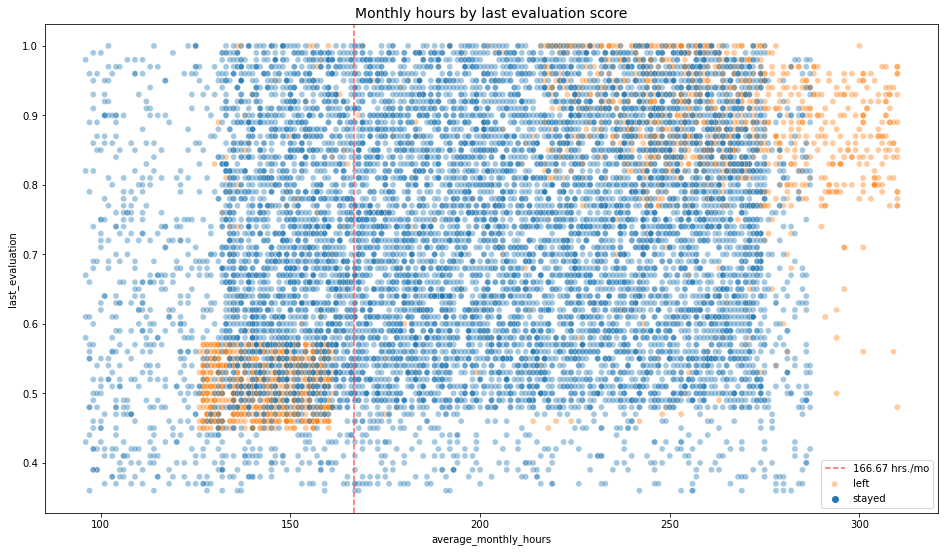

In [20]:
# Create scatterplot of 'average_monthly_hours' versus 'last_evaluation'
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',
               hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');



In [ ]:
The scatterplot shows two groups of employees that left: overworked
employees that performed very good, and those that worked slightly
under the average monthly hours of 166.67 with lower evaluation scores.
There is a correlation between hours worked and evaluation score.
Woking long hours is not a guarantee of a good evaluation score. Most 
the employees worked over 167 hours per month.

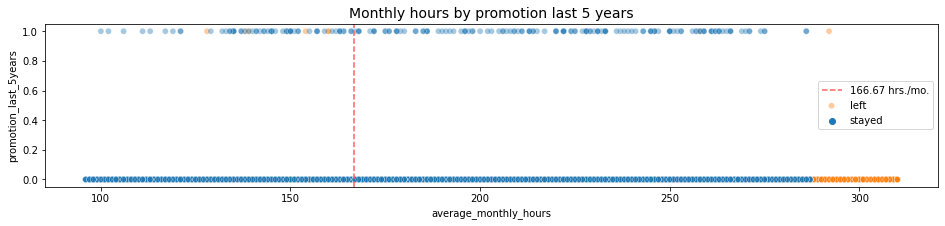

In [21]:
# Create scatterplot to examine relationship between 
# 'average_monthly_hours' and 'promotion_last_5years'
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years',
               hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [ ]:
The plot shows that few employees were promoted in the last 5 years left. 
A small number of employees that worked the most hours were
promoted. All of the employees that left worked the longest hours.

In [22]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

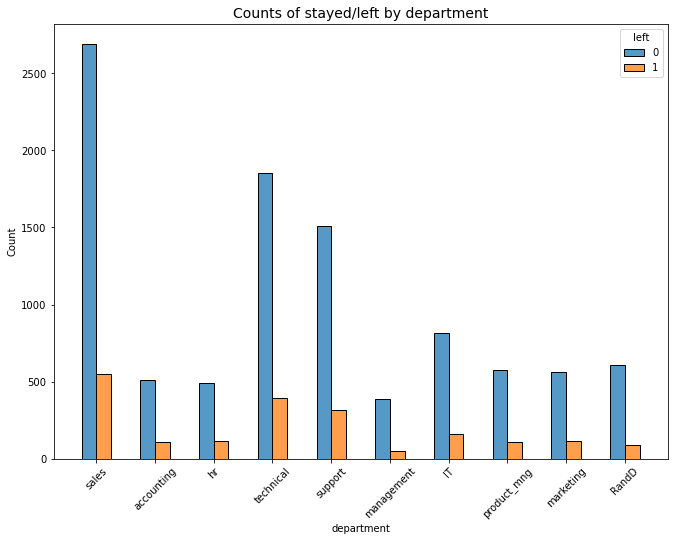

In [23]:
# Create stacked histogram to compare department distribution of employees 
# who left to those that stayed.
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
            hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


In [ ]:
There does not seem to be a big difference among the departments with 
employees that stayed and left.

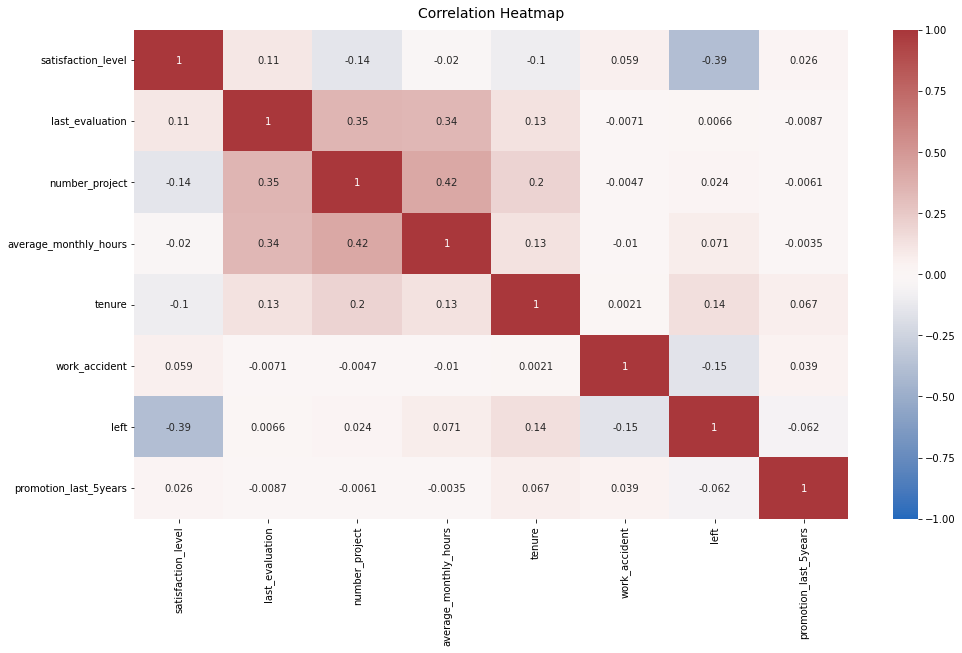

In [24]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.
                     color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


In [ ]:
The correlation heatmap confirms the number of projects, monthly hours, 
and evaluation scores all have some positive correlation with each other,
and whether an employee leaves is negatively correlated with satisfaction
level.

### Insights

It seems because of poor management employees are leaving the company. Leaving is connected to longer working hours, many prijects and low satisfaction level. It seems as when an employees reaches 6 years at the company, they would stay.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My goal is to predict if an employee will leave the company, which is categorical.

### Identify the types of models most appropriate for this task.

Logistic Regression model

The binomial logistic regression suits the task because because it involves binary classification.

Before splitting the data, I need to encode the non-numeric variables-department and salary.

department is a categorical variable, which means I can dummy it for modeling.

salay is categorical too, but ordinal. So it is better to convert the levels to numbers, 0-2.


### Modeling

Add as many cells as you need to conduct the modeling process.

In [25]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the 'salary' column as an ordinal category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


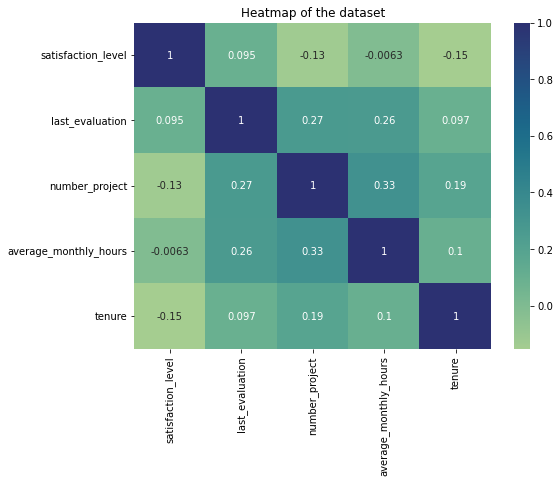

In [27]:
# Create a heatmap to visualize how correlated the variables are.
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project',
                   'average_monthly_hours', 'tenure']]
                            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

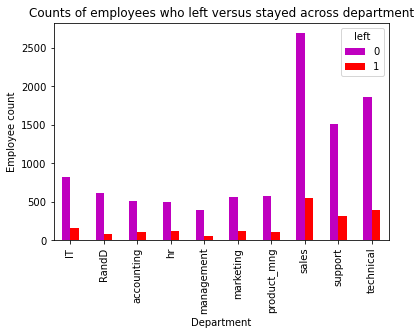

In [28]:
# Create a stacked barplot to visualize number of employees across department,
# comparing those who left and stayed  
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [29]:
# Select rows without outliers in 'tenure' and save results in a dataframe,
# a new variable.
df_lowup = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <=
                                                       upper_limit)]
# Display first few rows of new dataframe
df_lowup.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Isolate the outcome variable
y = df_lowup['left']

# Display a few rows of the variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [31]:
# Select the features to use in the model
X = df_lowup.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   stratify=y, random_state=42)

In [ ]:
Constuct a logistic regression model and fit it to the training dataset

In [33]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train,
                                                               y_train)

In [ ]:
Test the logistic regression model and fit it to the training dataset

In [34]:
# Use the logistic regression model to get predictions on the test set.
y_pred = log_clf.predict(X_test)

In [ ]:
Create a confusion matrix to visualize the results of the logistic regression model

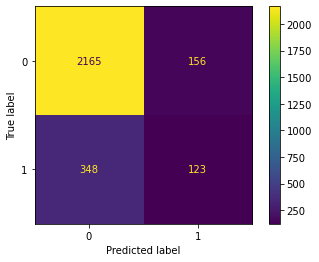

In [35]:
# Compute values for the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                 display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [ ]:
The upper-left quandrant displays the number of true negatives. The upper right
quandrant displays the number of false negatives. The bottom left quantrant 
displays the number of false negatives. The bottom-right quandrant displays
the number of true positives.

True negatives: The number of people who did not leave that the model
accurately predicted did not leave.

False positive: The number of people who did not leave and the model
inaccurately predicted as leaving.

False negative: The nuber of people who left that the model 
inaccurately predicted did not leave.

True positive: The number of people who left and the model accurately
predicted as leaving.



In [ ]:
Create a classification report that includes prcision, recall, 
f1-score, and accuracy metrics to evaluate the performance of the 
logistic regression model.

In [36]:
# Check the class balance in the data.
df_lowup['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [ ]:
There is approximately 83% - 17% split. In this case I can use this data
without modifying the class balance and continue evaluating the model.

In [37]:
# Create classification report for logistic regression model.
target_names = ['Predicted would not leave', 'Predicted would leave ']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
   Predicted would leave        0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [ ]:
The classification report shows that the logistic regression model
achieved a precision of 79%, recall of 82%, f1-score of 80%, and 
accuracy of 82% . However, if it is very important to predict employees
who leave, then the scores are very low.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regressionmodel achieved precision of 79%, recall of 82%, f1-score of 80%, and accuracy of 82% on the test

### Conclusion, Recommendations, Next Steps

The model confirm that employees are over worked.

To retain employees, the following recommendations are shared:
Limit the number of projects for employees
Promote employees who have been with the company for at least four years
Do not require employees to work longer hours.
Hold meetings to discuss and address the company's work culture.

Next Steps
For another project, a K-means model can be built and analyzed. This would create valuable insights.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.